# **Medical Insurance Cost Prediction ML Model**

---



**Group Members and Their Contributions**


* ITBIN - 2110 - 0110
* ITBIN - 2110 - 0141
* ITBIN - 2110 - 0159
* ITBIN - 2110 - 0077
* ITBIN - 2110 - 0116



## **Load the Dataset**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Checking Missing Values**

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## **Checking DataTypes**

In [ ]:
data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


## **Checking the number of raws**

In [ ]:
data.shape

(1338, 7)

## **Checking columns**

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## **Statistical Values**

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##**Informations about the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## **Check the Duplicates Values**

In [ ]:
data.duplicated().sum()

1

###**Display the Duplicated Raws**

In [ ]:
duplicates = data[data.duplicated(keep= False)]
duplicates

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


###**Delete the Duplicate raw**

In [ ]:
new_data = data.drop_duplicates()
print('Shape of Old Dataset', data.shape)
print('shape of New Dataset', new_data.shape)

Shape of Old Dataset (1338, 7)
shape of New Dataset (1337, 7)


In [ ]:
new_data.duplicated().sum()

0

## **Handling Outliers**

In [ ]:
new_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: ylabel='age'>

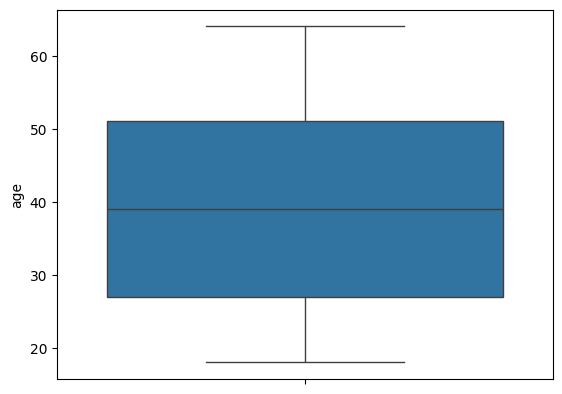

In [ ]:
#cheking outliers in age column
sns.boxplot(new_data['age'])

<Axes: ylabel='bmi'>

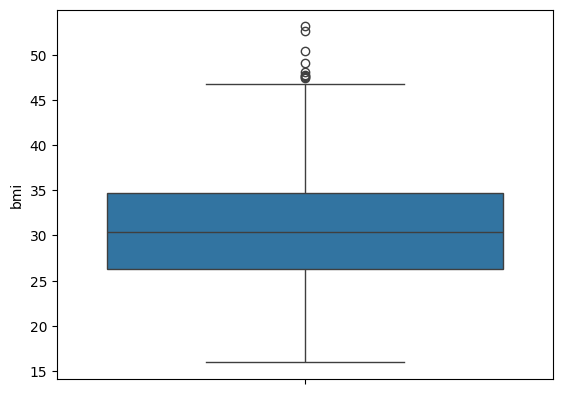

In [ ]:
# checking outliers in bmi column
sns.boxplot(new_data['bmi'])

<ipython-input-16-1ae064660740>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

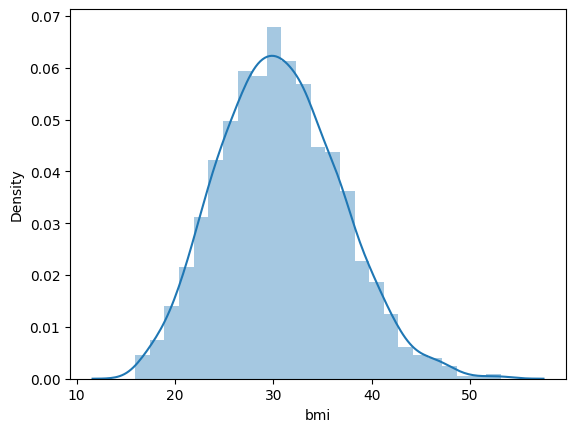

In [ ]:
sns.distplot(new_data['bmi'])

In [ ]:
px.box(new_data['bmi'])

###**Display the outliers**

In [ ]:
upper_limit = 46.75
lower_limit = 15.96
outliers_bmi = new_data[(new_data['bmi'] > upper_limit) | (new_data['bmi'] < lower_limit)]
outliers_bmi

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


###**Co-relationship Before deleting the Outliers in BMI column**

In [ ]:
new_data[['age', 'bmi', 'charges']].corr()

,age,bmi,charges
age,1.000000,0.109344,0.298308
bmi,0.109344,1.000000,0.198401
charges,0.298308,0.198401,1.000000


In [ ]:
new_data.shape

(1337, 7)

In [ ]:
new_data = new_data.loc[(new_data['bmi'] <= upper_limit) & (new_data['bmi'] >= lower_limit)]

###**Co-reletionship after deleting the Outliers in BMI column**

In [ ]:
new_data[['age', 'bmi', 'charges']].corr()

,age,bmi,charges
age,1.000000,0.114785,0.301317
bmi,0.114785,1.000000,0.193270
charges,0.301317,0.193270,1.000000


In [ ]:
new_data.shape

(1328, 7)

###**Draw Boxplot and Distplot after deleting the coutliers in BMI column**

<Axes: ylabel='bmi'>

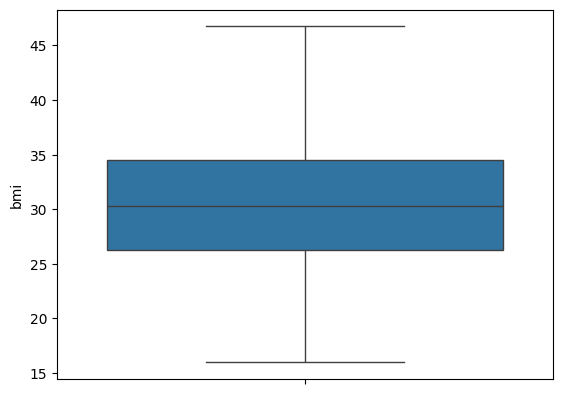

In [ ]:
sns.boxplot(new_data['bmi'])

<ipython-input-25-1ae064660740>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='bmi', ylabel='Density'>

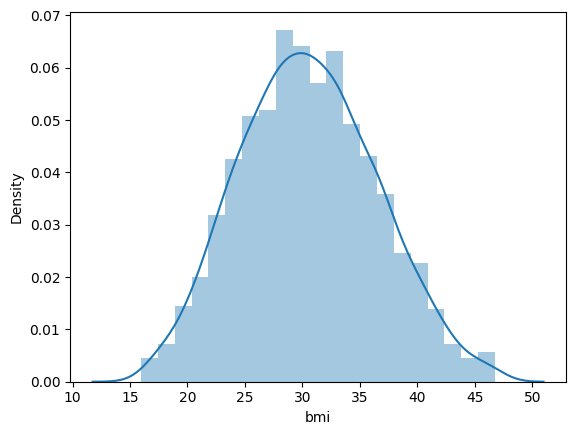

In [ ]:
sns.distplot(new_data['bmi'])

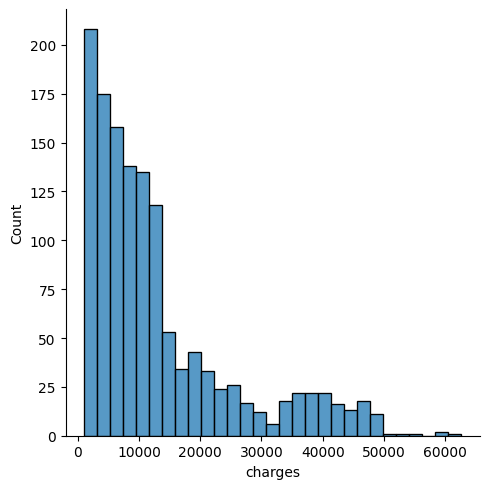

In [ ]:
sns.displot(new_data['charges'])

<ipython-input-27-899025dbef87>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='charges', ylabel='Density'>

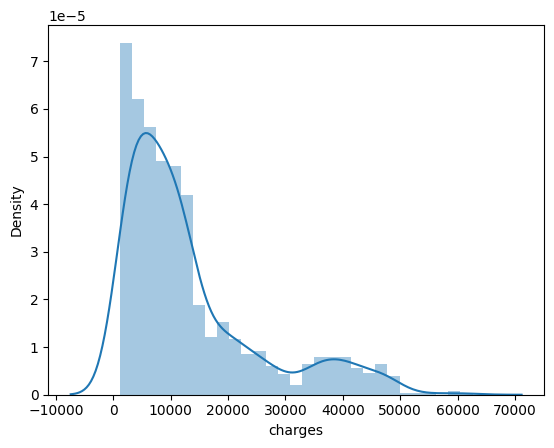

In [ ]:
sns.distplot(new_data['charges'])

##**Visualization**

In [ ]:
new_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###**Histogram**

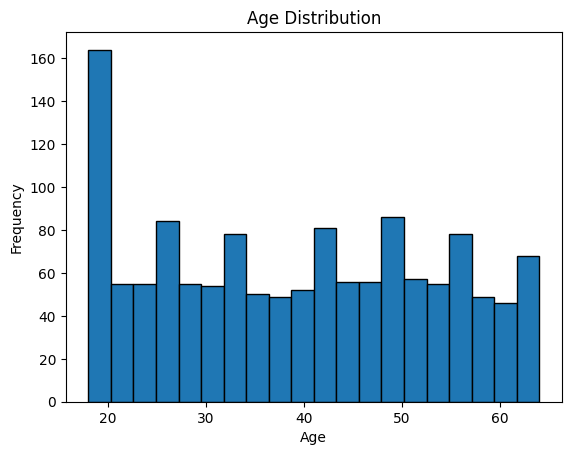

In [ ]:
plt.hist(new_data['age'], bins = 20, edgecolor= 'Black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [ ]:
new_data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

###**Bar Charts**

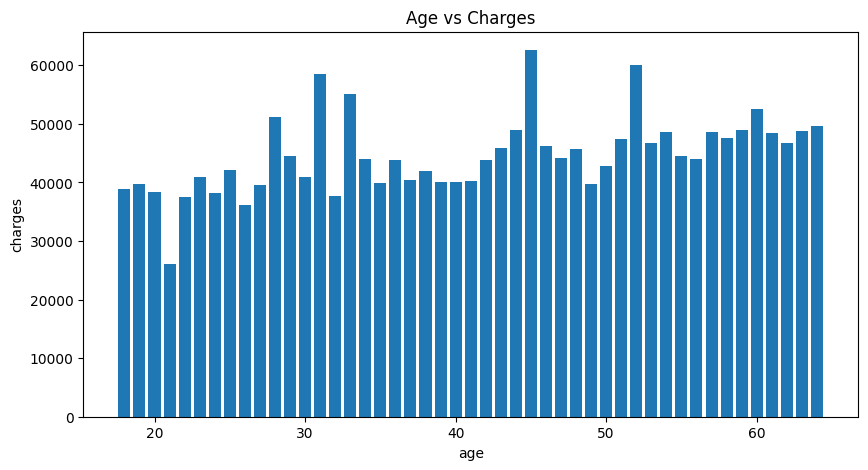

In [ ]:
x = new_data['age']
y = new_data['charges']
plt.figure(figsize=(10,5))
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Age vs Charges")
plt.bar(x,y)
plt.show()

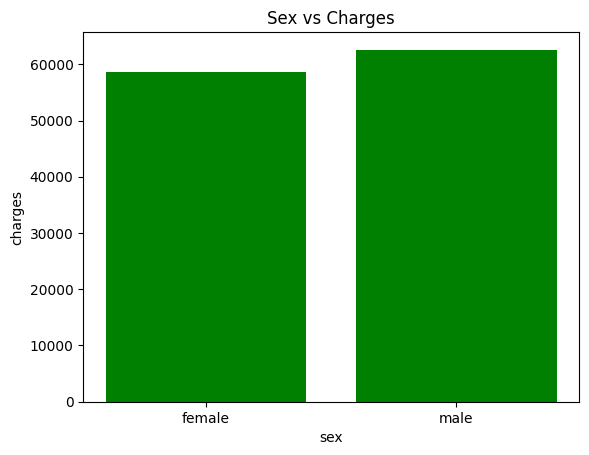

In [ ]:
x = new_data['sex']
y = new_data['charges']
plt.xlabel("sex")
plt.ylabel('charges')
plt.title("Sex vs Charges")
plt.bar(x,y, color = 'green')
plt.show()

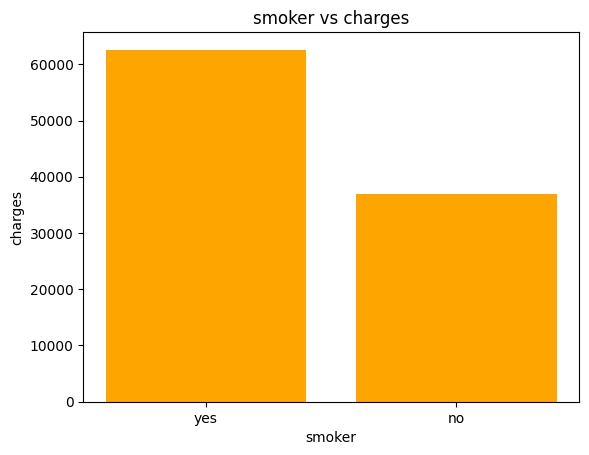

In [ ]:
x = new_data['smoker']
y = new_data['charges']
plt.xlabel("smoker")
plt.ylabel("charges")
plt.title("smoker vs charges")
plt.bar(x,y, color='orange')
plt.show()

In [ ]:
new_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
new_data['region'].value_counts()

,count
region,
southeast,357
southwest,324
northwest,324
northeast,323


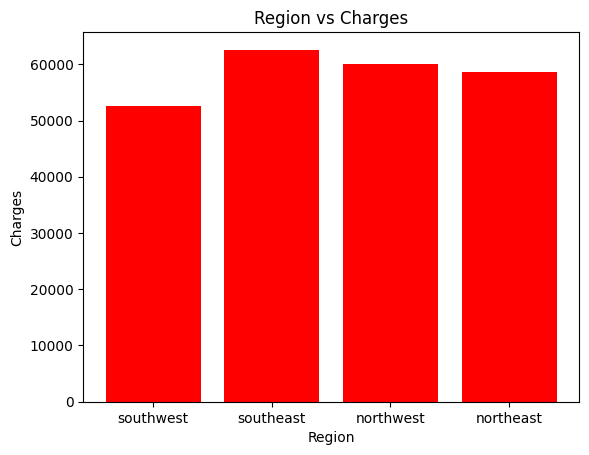

In [ ]:
x = new_data['region']
y = new_data['charges']
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Region vs Charges")
plt.bar(x,y, color ='red')
plt.show()

###**Pie Charts**

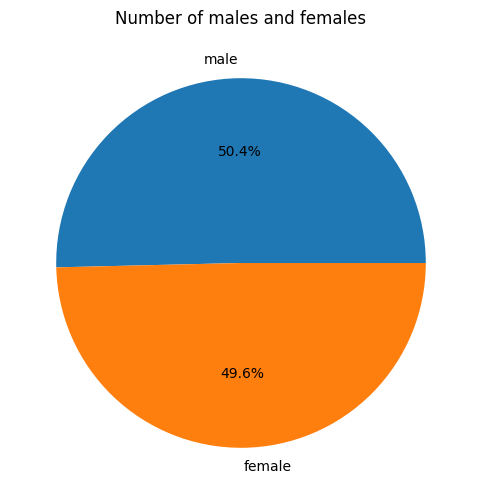

In [ ]:
sizes = new_data['sex'].value_counts()
labels = sizes.index
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels , autopct='%1.1f%%')
plt.title('Number of males and females')
plt.show()

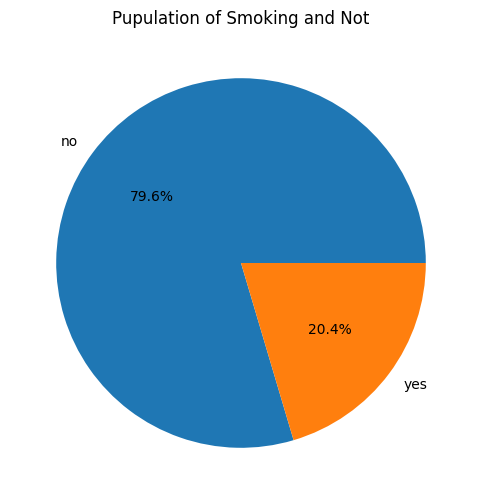

In [ ]:
sizes = new_data['smoker'].value_counts()
labels = sizes. index
plt.figure(figsize=(6,6))
plt.title("Pupulation of Smoking and Not")
plt.pie(sizes, labels=labels, autopct = '%1.1f%%')
plt.show()

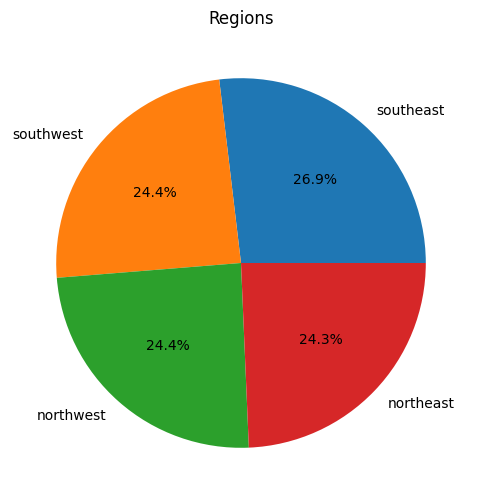

In [ ]:
sizes = new_data['region'].value_counts()
labels = sizes.index
plt.figure(figsize = (6,6))
plt.title("Regions")
plt.pie(sizes, labels = labels, autopct = '%1.1f%%')
plt.show()

###**Count Plot**

<Axes: xlabel='children', ylabel='count'>

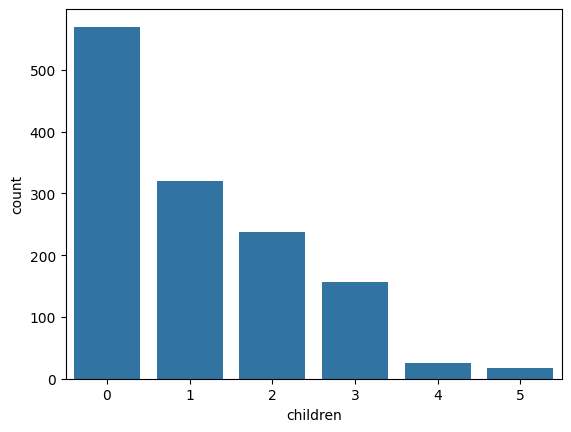

In [ ]:
sns.countplot(x = new_data['children'])

##**Convert Categorical values into Numeric Values**

In [ ]:
new_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Label Encoding**

In [ ]:
new_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
new_data['sex'].value_counts()

,count
sex,
male,669
female,659


In [ ]:
# For 'sex' column
new_data['sex'] = new_data['sex'].map({'male': 1, 'female':0})
new_data['sex'].unique()

array([0, 1])

In [ ]:
new_data['sex'].value_counts()

,count
sex,
1,669
0,659


In [ ]:
new_data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
new_data['smoker'].value_counts()

,count
smoker,
no,1057
yes,271


In [ ]:
# for 'smoker' column
new_data['smoker'] = new_data['smoker'].map({'yes':1, 'no':0 })
new_data['smoker'].unique()

array([1, 0])

In [ ]:
new_data['smoker'].value_counts()

,count
smoker,
0,1057
1,271


In [ ]:
new_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
new_data['region'].value_counts()

,count
region,
southeast,357
southwest,324
northwest,324
northeast,323


In [ ]:
# for 'region' column
new_data['region'] = new_data['region'].map({'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3})
new_data['region'].unique()

array([1, 0, 2, 3])

In [ ]:
new_data['region'].value_counts()

,count
region,
0,357
1,324
2,324
3,323


In [ ]:
new_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## **Co - Relation Heatmap**

<Axes: >

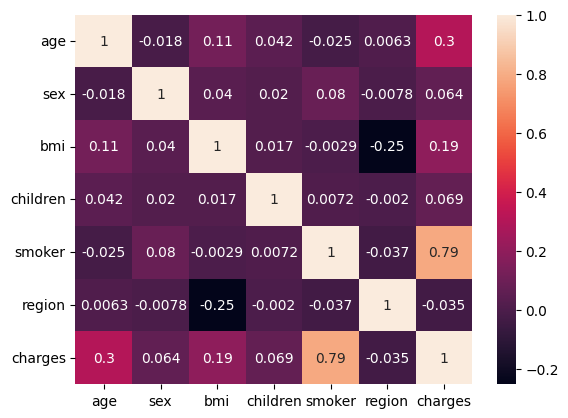

In [ ]:
sns.heatmap(new_data.corr(), annot=True)

##**Training and Evaluation the Machine Learning Models**

In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


###**fitling data into X and Y**

In [ ]:
X = new_data.drop(columns = 'charges', axis = 1)
Y = new_data['charges']

###**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler().set_output(transform="pandas")
X_normalized = scaler.fit_transform(X)

X_normalized.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       2
4      32    1  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       2
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       2

[1328 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1328, dtype: float64


###**Spliting the data into Training and Testing**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized,Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(1328, 6) (1062, 6) (266, 6)


In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1328,) (1062,) (266,)


###**Model Training and Evalution Using Linear Regression Model**

In [ ]:
model_lr = LinearRegression()

model_lr.fit(X_train,Y_train)

# Make predictions on the test set
y_pred_test = model_lr.predict(X_test)
y_pred_train = model_lr.predict(X_train)

mse_train = mean_squared_error(Y_train, y_pred_train)
print(f"Mean Squared Error train: {mse_train:.2f}")

mae_train = mean_absolute_error(Y_train, y_pred_train)
print(f"Mean Absolute Error Training: {mae_train:.2f} " )

r2_train = r2_score(Y_train, y_pred_train)
print(f"R-squared score Train: {r2_train:.2f}")

# Calculate the Mean Squared Error (MSE) for testing data
mse_test = mean_squared_error(Y_test, y_pred_test)
print(f"Mean Squared Error test: {mse_test:.2f}")

# Calculate the Mean absolute Error (MAE) for testing data
mae_test = mean_absolute_error(Y_test, y_pred_test)
print(f"Mean Absolute Error Training: {mae_test:.2f} " )

# Calculate the R-squared score for testing data
r2_test = r2_score(Y_test, y_pred_test)
print(f"R-squared score Test: {r2_test:.2f}")

# Metrics for LR
LR_metrics = {
    'Model': 'Lenear Regression',
    'MSE Train': f"{mse_train:.2f}",
    'MAE Train': f"{mae_train:.2f}",
    'R2 Train': f"{r2_train:.2f}",
    'MSE Test':f"{mse_test:.2f}",
    'MAE Test': f"{mae_test:.2f}",
    'R2 Test': f"{r2_test:.2f}"
}


Mean Squared Error train: 36238736.33
Mean Absolute Error Training: 4169.83 
R-squared score Train: 0.75
Mean Squared Error test: 35146101.14
Mean Absolute Error Training: 4077.28 
R-squared score Test: 0.75


###**Model Training and Evalution Using Random Forest Regression Model**

In [ ]:
model_RFR = RandomForestRegressor(n_estimators=100)
# mode1 = DecisionTreeRegressor()

model_RFR.fit(X_train,Y_train)

# Make predictions on the test set
y_pred_test = model_RFR.predict(X_test)
y_pred_train = model_RFR.predict(X_train)

mse_train = mean_squared_error(Y_train, y_pred_train)
print(f"Mean Squared Error train: {mse_train:.2f}")

mae_train = mean_absolute_error(Y_train, y_pred_train)
print(f"Mean Absolute Error Training: {mae_train:.2f} " )

r2_train = r2_score(Y_train, y_pred_train)
print(f"R-squared score Train: {r2_train:.2f}")

# Calculate the Mean Squared Error (MSE) for testing data
mse_test = mean_squared_error(Y_test, y_pred_test)
print(f"Mean Squared Error test: {mse_test:.2f}")

# Calculate the Mean absolute Error (MAE) for testing data
mae_test = mean_absolute_error(Y_test, y_pred_test)
print(f"Mean Absolute Error Training: {mae_test:.2f} " )

# Calculate the R-squared score for testing data
r2_test = r2_score(Y_test, y_pred_test)
print(f"R-squared score Test: {r2_test:.2f}")

# Metrics for Random Forest Regression
RFR_metrics = {
    'Model': 'Random Forest Regression',
    'MSE Train': f"{mse_train:.2f}",
    'MAE Train': f"{mae_train:.2f}",
    'R2 Train': f"{r2_train:.2f}",
    'MSE Test':f"{mse_test:.2f}",
    'MAE Test': f"{mae_test:.2f}",
    'R2 Test': f"{r2_test:.2f}"
}


Mean Squared Error train: 3420686.90
Mean Absolute Error Training: 984.89 
R-squared score Train: 0.98
Mean Squared Error test: 27092683.18
Mean Absolute Error Training: 2929.50 
R-squared score Test: 0.81


###**Model Training and Evalution Using Decision Tree Regression Model**

In [ ]:
model_dt_regression = DecisionTreeRegressor()
model_dt_regression.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = model_dt_regression.predict(X_test)
y_pred_train = model_dt_regression.predict(X_train)

mse_train = mean_squared_error(Y_train, y_pred_train)
print(f"Mean Squared Error train: {mse_train:.2f}")

mae_train = mean_absolute_error(Y_train, y_pred_train)
print(f"Mean Absolute Error Training: {mae_train:.2f} " )

r2_train = r2_score(Y_train, y_pred_train)
print(f"R-squared score Train: {r2_train:.2f}")

# Calculate the Mean Squared Error (MSE) for testing data
mse_test = mean_squared_error(Y_test, y_pred_test)
print(f"Mean Squared Error test: {mse_test:.2f}")

# Calculate the Mean absolute Error (MAE) for testing data
mae_test = mean_absolute_error(Y_test, y_pred_test)
print(f"Mean Absolute Error Training: {mae_test:.2f} " )

# Calculate the R-squared score for testing data
r2_test = r2_score(Y_test, y_pred_test)
print(f"R-squared score Test: {r2_test:.2f}")

# Metrics for LR
DTR_metrics = {
    'Model': 'Decision Tree',
    'MSE Train': f"{mse_train:.2f}",
    'MAE Train': f"{mae_train:.2f}",
    'R2 Train': f"{r2_train:.2f}",
    'MSE Test':f"{mse_test:.2f}",
    'MAE Test': f"{mae_test:.2f}",
    'R2 Test': f"{r2_test:.2f}"
}


Mean Squared Error train: 172501.05
Mean Absolute Error Training: 18.02 
R-squared score Train: 1.00
Mean Squared Error test: 56627755.43
Mean Absolute Error Training: 3571.05 
R-squared score Test: 0.59


###**Model Training and Evalution Using Support Vector Regression Model**

In [ ]:
model_SVR = SVR(kernel= 'rbf')
model_SVR.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = model_SVR.predict(X_test)
y_pred_train = model_SVR.predict(X_train)

mse_train = mean_squared_error(Y_train, y_pred_train)
print(f"Mean Squared Error train: {mse_train:.2f}")

mae_train = mean_absolute_error(Y_train, y_pred_train)
print(f"Mean Absolute Error Training: {mae_train:.2f} " )

r2_train = r2_score(Y_train, y_pred_train)
print(f"R-squared score Train: {r2_train:.2f}")

# Calculate the Mean Squared Error (MSE) for testing data
mse_test = mean_squared_error(Y_test, y_pred_test)
print(f"Mean Squared Error test: {mse_test:.2f}")

# Calculate the Mean absolute Error (MAE) for testing data
mae_test = mean_absolute_error(Y_test, y_pred_test)
print(f"Mean Absolute Error Training: {mae_test:.2f} " )

# Calculate the R-squared score for testing data
r2_test = r2_score(Y_test, y_pred_test)
print(f"R-squared score Test: {r2_test:.2f}")

# Metrics for LR
SVR_metrics = {
    'Model': 'Support Vector',
    'MSE Train': f"{mse_train:.2f}",
    'MAE Train': f"{mae_train:.2f}",
    'R2 Train': f"{r2_train:.2f}",
    'MSE Test':f"{mse_test:.2f}",
    'MAE Test': f"{mae_test:.2f}",
    'R2 Test': f"{r2_test:.2f}"
}


Mean Squared Error train: 158631534.47
Mean Absolute Error Training: 8296.85 
R-squared score Train: -0.09
Mean Squared Error test: 151782751.69
Mean Absolute Error Training: 8089.46 
R-squared score Test: -0.09


###**Model Training and Evalution Using Ridge Regression Model**

In [ ]:
model_rr = Ridge(max_iter=100, random_state=3)
model_rr.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = model_rr.predict(X_test)
y_pred_train = model_rr.predict(X_train)

mse_train = mean_squared_error(Y_train, y_pred_train)
print(f"Mean Squared Error train: {mse_train:.2f}")

mae_train = mean_absolute_error(Y_train, y_pred_train)
print(f"Mean Absolute Error Training: {mae_train:.2f} " )

r2_train = r2_score(Y_train, y_pred_train)
print(f"R-squared score Train: {r2_train:.2f}")

# Calculate the Mean Squared Error (MSE) for testing data
mse_test = mean_squared_error(Y_test, y_pred_test)
print(f"Mean Squared Error test: {mse_test:.2f}")

# Calculate the Mean absolute Error (MAE) for testing data
mae_test = mean_absolute_error(Y_test, y_pred_test)
print(f"Mean Absolute Error Training: {mae_test:.2f} " )

# Calculate the R-squared score for testing data
r2_test = r2_score(Y_test, y_pred_test)
print(f"R-squared score Test: {r2_test:.2f}")

# Metrics for LR
RR_metrics = {
    'Model': 'Ridge Regression',
    'MSE Train': f"{mse_train:.2f}",
    'MAE Train': f"{mae_train:.2f}",
    'R2 Train': f"{r2_train:.2f}",
    'MSE Test':f"{mse_test:.2f}",
    'MAE Test': f"{mae_test:.2f}",
    'R2 Test': f"{r2_test:.2f}"
}


Mean Squared Error train: 36246118.97
Mean Absolute Error Training: 4164.85 
R-squared score Train: 0.75
Mean Squared Error test: 35072121.67
Mean Absolute Error Training: 4064.85 
R-squared score Test: 0.75


###**Model Training and Evalution Using K-Neighbors Regression Model**

In [ ]:
model_KNR = KNeighborsRegressor()
model_KNR.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = model_KNR.predict(X_test)
y_pred_train = model_KNR.predict(X_train)

mse_train = mean_squared_error(Y_train, y_pred_train)
print(f"Mean Squared Error train: {mse_train:.2f}")

mae_train = mean_absolute_error(Y_train, y_pred_train)
print(f"Mean Absolute Error Training: {mae_train:.2f} " )

r2_train = r2_score(Y_train, y_pred_train)
print(f"R-squared score Train: {r2_train:.2f}")

# Calculate the Mean Squared Error (MSE) for testing data
mse_test = mean_squared_error(Y_test, y_pred_test)
print(f"Mean Squared Error test: {mse_test:.2f}")

# Calculate the Mean absolute Error (MAE) for testing data
mae_test = mean_absolute_error(Y_test, y_pred_test)
print(f"Mean Absolute Error Training: {mae_test:.2f} " )

# Calculate the R-squared score for testing data
r2_test = r2_score(Y_test, y_pred_test)
print(f"R-squared score Test: {r2_test:.2f}")

# Metrics for LR
KNR_metrics = {
    'Model': 'K-Neighbors',
    'MSE Train': f"{mse_train:.2f}",
    'MAE Train': f"{mae_train:.2f}",
    'R2 Train': f"{r2_train:.2f}",
    'MSE Test':f"{mse_test:.2f}",
    'MAE Test': f"{mae_test:.2f}",
    'R2 Test': f"{r2_test:.2f}"
}



Mean Squared Error train: 19903939.08
Mean Absolute Error Training: 2639.50 
R-squared score Train: 0.86
Mean Squared Error test: 33049365.18
Mean Absolute Error Training: 3501.26 
R-squared score Test: 0.76


###**Model Training and Evalution Using Gradient Boost Regression Model**

In [ ]:

model_gb_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model_gb_regressor.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = model_gb_regressor.predict(X_test)
y_pred_train = model_gb_regressor.predict(X_train)

mse_train = mean_squared_error(Y_train, y_pred_train)
print(f"Mean Squared Error train: {mse_train:.2f}")

mae_train = mean_absolute_error(Y_train, y_pred_train)
print(f"Mean Absolute Error Training: {mae_train:.2f} " )

r2_train = r2_score(Y_train, y_pred_train)
print(f"R-squared score Train: {r2_train:.2f}")

# Calculate the Mean Squared Error (MSE) for testing data
mse_test = mean_squared_error(Y_test, y_pred_test)
print(f"Mean Squared Error test: {mse_test:.2f}")

# Calculate the Mean absolute Error (MAE) for testing data
mae_test = mean_absolute_error(Y_test, y_pred_test)
print(f"Mean Absolute Error Training: {mae_test:.2f} " )

# Calculate the R-squared score for testing data
r2_test_old = r2_score(Y_test, y_pred_test)
print(f"R-squared score Test: {r2_test_old:.2f}")

# Metrics for LR
GBR_metrics = {
    'Model': 'Gradient Boost',
    'MSE Train': f"{mse_train:.2f}",
    'MAE Train': f"{mae_train:.2f}",
    'R2 Train': f"{r2_train:.2f}",
    'MSE Test':f"{mse_test:.2f}",
    'MAE Test': f"{mae_test:.2f}",
    'R2 Test': f"{r2_test_old:.2f}"
}



Mean Squared Error train: 13488925.20
Mean Absolute Error Training: 1982.43 
R-squared score Train: 0.91
Mean Squared Error test: 22192338.17
Mean Absolute Error Training: 2611.59 
R-squared score Test: 0.84


### **XGB Regression**

In [ ]:

model_XGB_Regression = XGBRegressor(random_state=42)

model_XGB_Regression.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_test = model_XGB_Regression.predict(X_test)
y_pred_train = model_XGB_Regression.predict(X_train)

mse_train = mean_squared_error(Y_train, y_pred_train)
print(f"Mean Squared Error train: {mse_train:.2f}")

mae_train = mean_absolute_error(Y_train, y_pred_train)
print(f"Mean Absolute Error Training: {mae_train:.2f} " )

r2_train = r2_score(Y_train, y_pred_train)
print(f"R-squared score Train: {r2_train:.2f}")

# Calculate the Mean Squared Error (MSE) for testing data
mse_test = mean_squared_error(Y_test, y_pred_test)
print(f"Mean Squared Error test: {mse_test:.2f}")

# Calculate the Mean absolute Error (MAE) for testing data
mae_test = mean_absolute_error(Y_test, y_pred_test)
print(f"Mean Absolute Error Training: {mae_test:.2f} " )

# Calculate the R-squared score for testing data
r2_test = r2_score(Y_test, y_pred_test)
print(f"R-squared score Test: {r2_test:.2f}")

# Metrics for LR
XGB_metrics = {
    'Model': 'XGBoost',
    'MSE Train': f"{mse_train:.2f}",
    'MAE Train': f"{mae_train:.2f}",
    'R2 Train': f"{r2_train:.2f}",
    'MSE Test':f"{mse_test:.2f}",
    'MAE Test': f"{mae_test:.2f}",
    'R2 Test': f"{r2_test:.2f}"
}



Mean Squared Error train: 522099.93
Mean Absolute Error Training: 387.42 
R-squared score Train: 1.00
Mean Squared Error test: 27563828.95
Mean Absolute Error Training: 2990.52 
R-squared score Test: 0.80


### **Performance of Models**

In [ ]:
# Create a DataFrame to hold the results
metrics_df = pd.DataFrame([LR_metrics, RFR_metrics, DTR_metrics, SVR_metrics, RR_metrics, KNR_metrics, GBR_metrics, XGB_metrics])
metrics_df.set_index('Model', inplace=True)

# Display the DataFrame
print(metrics_df)

                             MSE Train MAE Train R2 Train      MSE Test  \
Model                                                                     
Lenear Regression          36238736.33   4169.83     0.75   35146101.14   
Random Forest Regression    3420686.90    984.89     0.98   27092683.18   
Decision Tree                172501.05     18.02     1.00   56627755.43   
Support Vector            158631534.47   8296.85    -0.09  151782751.69   
Ridge Regression           36246118.97   4164.85     0.75   35072121.67   
K-Neighbors                19903939.08   2639.50     0.86   33049365.18   
Gradient Boost             13488925.20   1982.43     0.91   22192338.17   
XGBoost                      522099.93    387.42     1.00   27563828.95   

                         MAE Test R2 Test  
Model                                      
Lenear Regression         4077.28    0.75  
Random Forest Regression  2929.50    0.81  
Decision Tree             3571.05    0.59  
Support Vector            808

### **Cross Validation**

In [ ]:
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100),
    DecisionTreeRegressor(),
    SVR(kernel='rbf'),
    Ridge(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
      ),
    XGBRegressor(random_state=42)
    ]

In [ ]:
def cv_models_compare(X_train, Y_train):
    for model in models:
        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')

        # Calculate mean MSE and convert to positive
        mean_mse = -np.mean(cv_scores)
        mean_rmse = np.sqrt(mean_mse)

        print(f"Model: {model.__class__.__name__}")
        print(f"Cross-Val MSE Scores: {cv_scores}")
        print(f"Mean RMSE: {mean_rmse:.2f}")
        print("------------------------------------------------")

# Call the function with your training data
cv_models_compare(X_train, Y_train)


Model: LinearRegression
Cross-Val MSE Scores: [-37084385.65046463 -47687903.15763567 -30626117.38006538
 -32695093.85739339 -27811185.63292432 -28000855.53293646
 -36618339.49973314 -50933262.97526139 -39986926.08373849
 -37977743.55844662]
Mean RMSE: 6078.01
------------------------------------------------
Model: RandomForestRegressor
Cross-Val MSE Scores: [-23038725.41948489 -24184096.35399496 -16701435.02776189
 -22076147.83482407 -16528804.86559152 -14801655.021874
 -24440498.12113741 -32738861.98946437 -29237453.61821818
 -27543855.79116998]
Mean RMSE: 4809.28
------------------------------------------------
Model: DecisionTreeRegressor
Cross-Val MSE Scores: [-50697667.61466205 -39194847.06486998 -30059616.08923215
 -46066327.40059082 -45060053.33454867 -21108504.966468
 -43829010.37637807 -53313871.05529387 -53252231.42119394
 -38522916.39352216]
Mean RMSE: 6489.26
------------------------------------------------
Model: SVR
Cross-Val MSE Scores: [-2.06455016e+08 -1.87886382e+08 -

### **Hyperparameter Tuning for Gradient Boosting Regressor**

In [ ]:
# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=gb_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the model
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Score: {-best_score:.2f}")

# Fit the best model on the training data
best_gb_model = GradientBoostingRegressor(**best_params, random_state=42)
best_gb_model.fit(X_train, Y_train)

# Evaluate on the test set
y_pred_test = best_gb_model.predict(X_test)
mse_test = mean_squared_error(Y_test, y_pred_test)
print(f"Test MSE: {mse_test:.2f}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
Best Cross-Validated Score: 20337851.65
Test MSE: 20148914.03


In [ ]:
# r2 score of GradientBoostingRegressor
r2_score_test = best_gb_model.score(X_test, Y_test)
print(f"Old Test R-squares: {r2_test_old:.2f}")
print(f"Test R-squared: {r2_score_test:.2f}")

Old Test R-squares: 0.84
Test R-squared: 0.86


## **Evaluate Model Performance using Visualization**

### **Residuals Distribution**

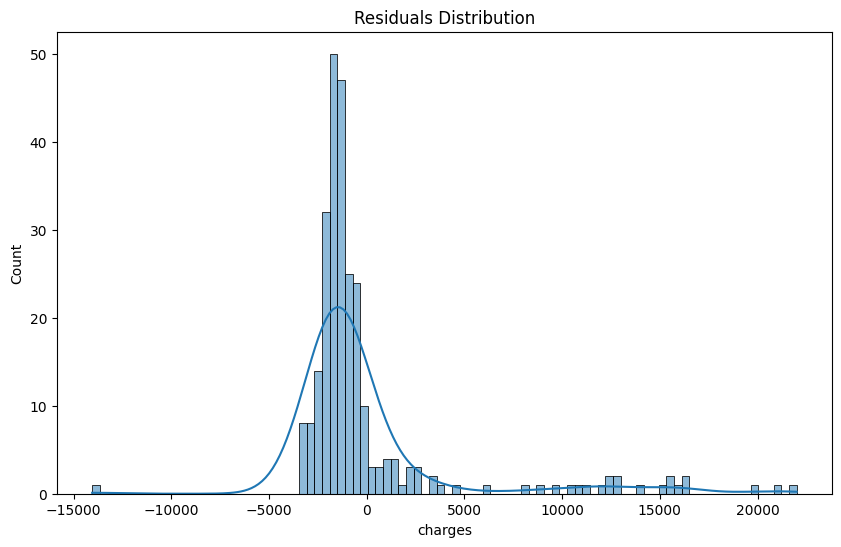

In [ ]:
residuals = Y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()


### **Scatter Plot**

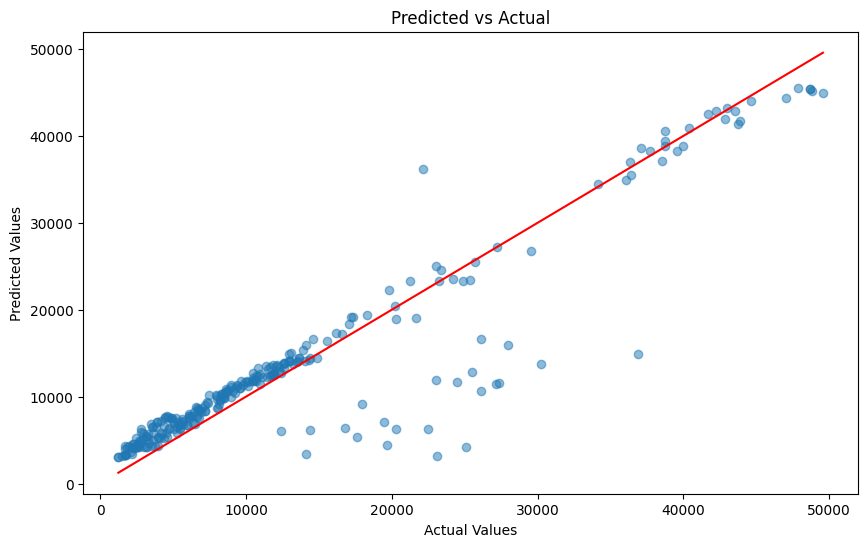

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_test, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  # Diagonal line
plt.show()


### **Most related features**

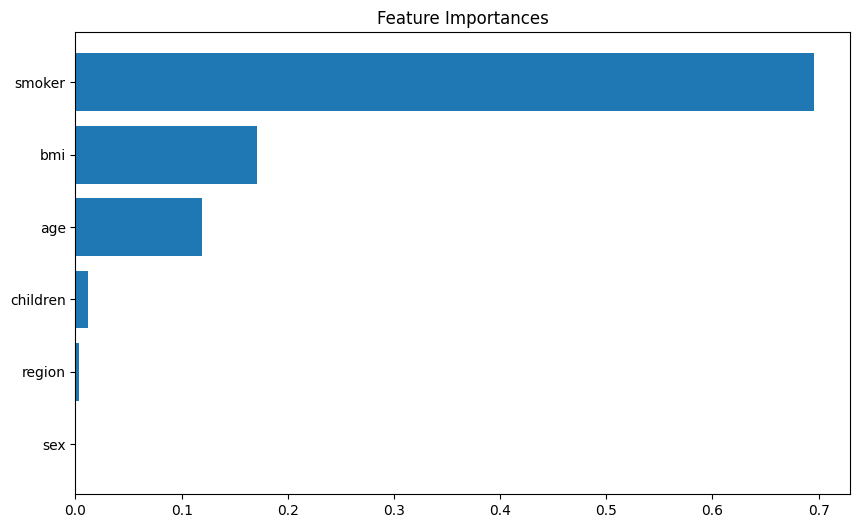

In [ ]:
feature_importances = best_gb_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.title("Feature Importances")
plt.show()


###**Model Evalution**

In [ ]:
input_data = ( 56,0,39.82,0,0,0)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = best_gb_model.predict(input_data_reshaped)
print(prediction)

[14158.88597996]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



# **Download the model**

In [ ]:
import pickle

file="GradientBoostingRegressor.pkl"
with open(file,'wb') as f:
  pickle.dump(best_gb_model,f)